In [ ]:
import random
import numpy
import keras
import math
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
import seaborn as sns
from tensorflow import keras
from IPython import display
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.datasets import mnist

## Multi-Layer Perceptron

In [ ]:
#
data4 = pd.read_csv('CarPrice_Assignment.csv')
data4

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Q4-1 - II :

print(data4.isna().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# Q4-1 - III :

i=0
data4['CompanyName'] = ""
for i in range(205):
  data4['CompanyName'][i] = data4['CarName'][i].split(" ")[0]

<ipython-input-74-c4895f489153>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['CompanyName'][i] = data4['CarName'][i].split(" ")[0]


In [ ]:
data4['CompanyName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CompanyName, Length: 205, dtype: object

In [ ]:
print(data4['CompanyName'].unique())  #
# maxda و Nissan و porcshce و toyouta و vokswagen و vw

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [ ]:
data4 = data4.replace('maxda','mazda')
data4 = data4.replace('Nissan','nissan')
data4 = data4.replace('porcshce','porsche')
data4 = data4.replace('toyouta','toyota')
data4 = data4.replace('vokswagen','volkswagen')
data4 = data4.replace('vw','volkswagen')

In [ ]:
print(data4['CompanyName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [ ]:
del data4['symboling' ]
del data4[ 'car_ID' ]
del data4['CarName']

In [ ]:
data4.info()  #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [ ]:
data4_2=(pd.get_dummies(data4))
data4_2

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Q4-1 - V:

import seaborn as sn
import matplotlib.pyplot as plt
print(data4.corr())
print("\n-------------------------------------------------------------------\n")

                  wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874587  0.795144   0.589435    0.776386   
carlength          0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth           0.795144   0.841118  1.000000   0.279210    0.867032   
carheight          0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight         0.776386   0.877728  0.867032   0.295572    1.000000   
enginesize         0.569329   0.683360  0.735433   0.067149    0.850594   
boreratio          0.488750   0.606454  0.559150   0.171071    0.648480   
stroke             0.160959   0.129533  0.182942  -0.055307    0.168790   
compressionratio   0.249786   0.158414  0.181129   0.261214    0.151362   
horsepower         0.353294   0.552623  0.640732  -0.108802    0.750739   
peakrpm           -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
citympg           -0.470414  -0.670909 -0.642704  -0.048640   -0.757414   
highwaympg        -0.5440

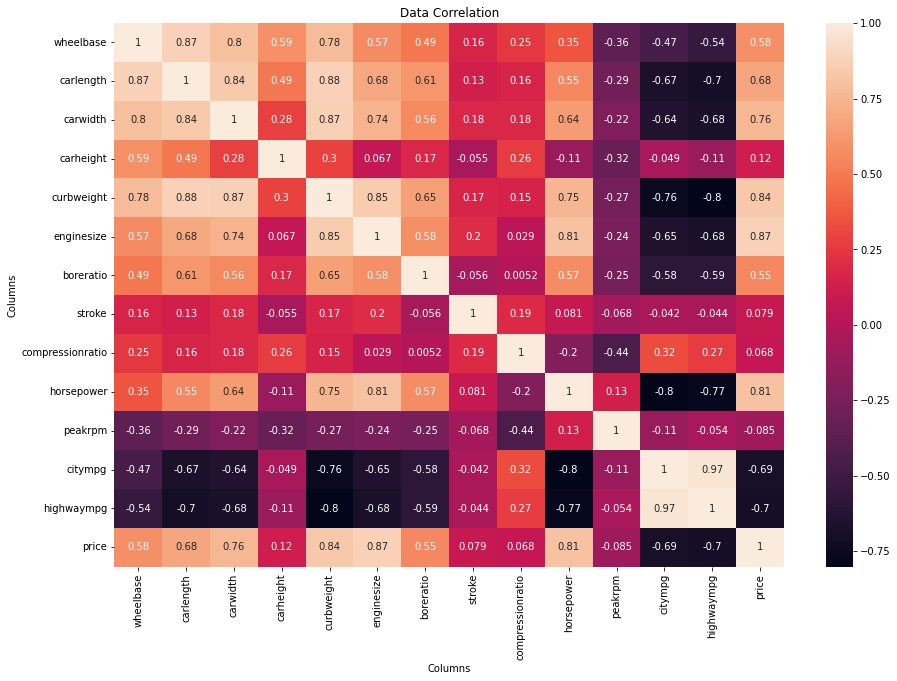

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(data4.corr(), annot=True)
plt.title("Data Correlation")
plt.ylabel("Columns")
plt.xlabel("Columns")
plt.show()

In [ ]:
data4.corr()['price'].sort_values(ascending = False)
# max correlatin : price and enginesize

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [ ]:
print(data4_2.corr())
print("\n-------------------------------------------------------------------\n")

                        wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase                1.000000   0.874587  0.795144   0.589435    0.776386   
carlength                0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth                 0.795144   0.841118  1.000000   0.279210    0.867032   
carheight                0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight               0.776386   0.877728  0.867032   0.295572    1.000000   
...                           ...        ...       ...        ...         ...   
CompanyName_saab         0.009927   0.177076  0.048052   0.169192    0.063495   
CompanyName_subaru      -0.107161  -0.105172 -0.111605   0.002570   -0.114888   
CompanyName_toyota      -0.046785  -0.073906 -0.164234  -0.000530   -0.094786   
CompanyName_volkswagen  -0.047664  -0.030714 -0.033924   0.149194   -0.101966   
CompanyName_volvo        0.306228   0.285398  0.228758   0.245342    0.221127   

                        eng

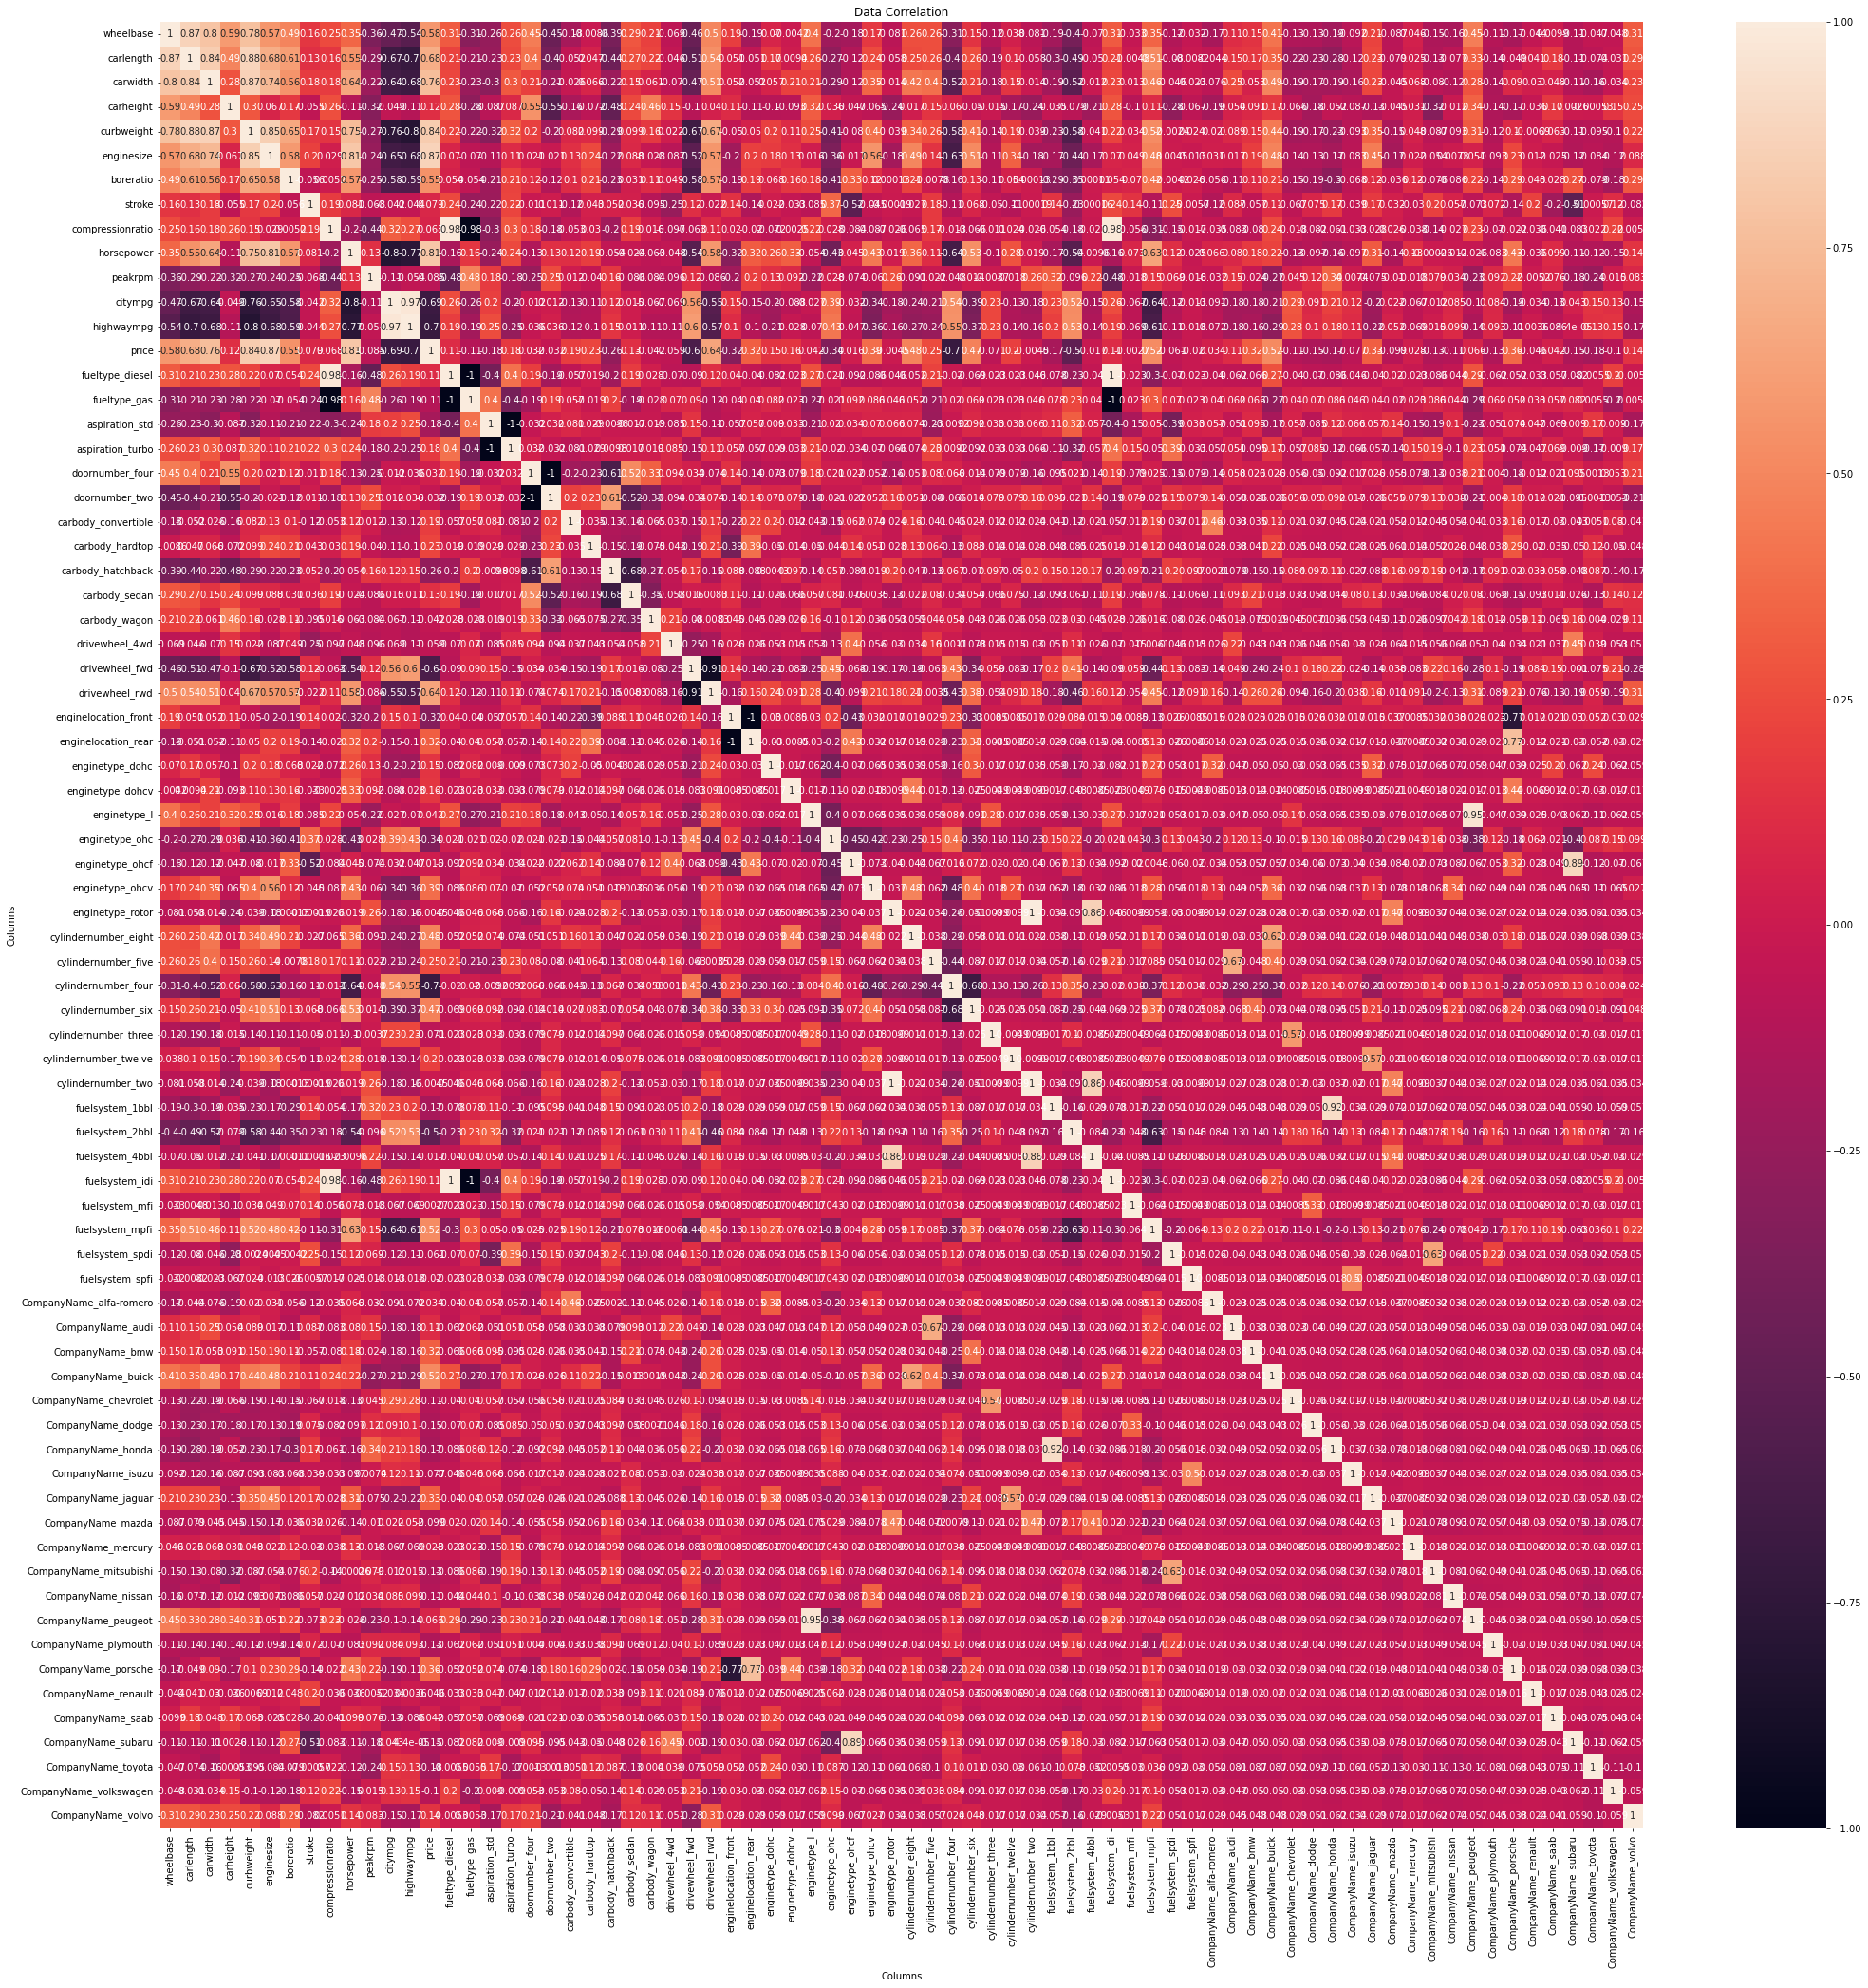

In [ ]:
fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(data4_2.corr(), annot=True)
plt.title("Data Correlation")
plt.ylabel("Columns")
plt.xlabel("Columns")
plt.show()

In [ ]:
data4_2.corr()['price'].sort_values(ascending = False)
# max correlatin : price and enginesize

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 74, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':' Car price distribution : '}, xlabel='price', ylabel='Density'>

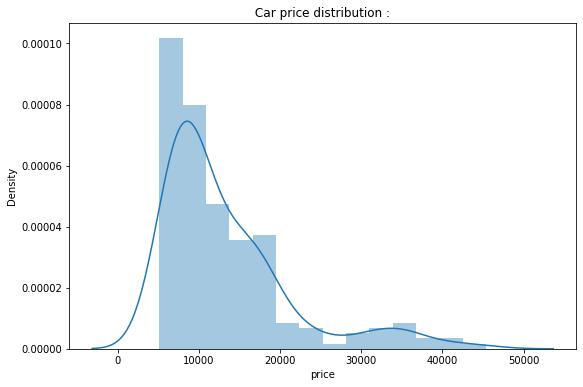

In [ ]:
# Q4-1 - VI:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title(' Car price distribution : ')
sns.distplot(data4_2.price)


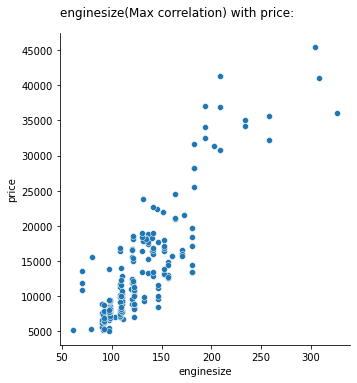

In [ ]:
p4=sns.pairplot(data4_2, x_vars='enginesize', y_vars='price', aspect=1, height=5, kind='scatter')
p4.fig.suptitle("enginesize(Max correlation) with price: ",y=1.05)
plt.show()

In [ ]:
# Q4-1 - VII:
trainn, testt = train_test_split(data4_2, train_size = 0.85, test_size = 0.15, random_state = 100 ,shuffle=True)

In [ ]:
# Q4-1 - VIII:

column_num = ['wheelbase', 'carlength','carwidth', 'carheight','curbweight','enginesize', 'boreratio', 'stroke','compressionratio','horsepower','peakrpm', 'highwaympg', 'price']
scaler = MinMaxScaler()
trainn[column_num] = scaler.fit_transform(trainn[column_num])
train2=trainn
testt[column_num] = scaler.transform(testt[column_num])
test2 = testt
#

In [ ]:
y_train = train2.pop("price")  #
x_train = train2

In [ ]:
y_test = test2.pop("price")
x_test = test2

In [ ]:
x_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
15,0.492711,0.714925,0.550000,0.658333,0.675718,0.558491,0.771429,0.628571,0.06250,0.558333,...,0,0,0,0,0,0,0,0,0,0
110,0.804665,0.862687,0.675000,0.908333,0.753297,0.343396,0.828571,0.690476,0.87500,0.195833,...,0,1,0,0,0,0,0,0,0,0
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,...,0,0,0,0,0,0,0,0,0,1
115,0.620991,0.680597,0.675000,0.741667,0.615593,0.222642,0.657143,0.533333,0.08750,0.204167,...,0,1,0,0,0,0,0,0,0,0
174,0.460641,0.514925,0.516667,0.591667,0.384794,0.184906,0.521429,0.609524,0.96875,0.104167,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.282799,0.467164,0.425000,0.316667,0.354926,0.184906,0.450000,0.661905,0.03125,0.283333,...,0,0,0,0,0,0,0,0,0,0
103,0.402332,0.649254,0.516667,0.608333,0.609775,0.452830,0.635714,0.571429,0.12500,0.433333,...,1,0,0,0,0,0,0,0,0,0
67,0.682216,0.743284,0.833333,0.725000,0.786268,0.460377,0.742857,0.747619,0.90625,0.312500,...,0,0,0,0,0,0,0,0,0,0
24,0.206997,0.241791,0.291667,0.233333,0.185803,0.109434,0.307143,0.552381,0.15000,0.083333,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

15     0.636562
110    0.217020
201    0.345738
115    0.285785
174    0.138523
         ...   
87     0.103297
103    0.208058
67     0.507274
24     0.027581
8      0.465642
Name: price, Length: 174, dtype: float64

In [ ]:
# Model_1 : 1 hidden layer
model_1 = keras.models.Sequential([
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(1)])

# Model_2 : 2 hidden layer
model_2 = keras.models.Sequential([
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)])

# Model_3 : 3 hidden layer
model_3 = keras.models.Sequential([
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)])


In [ ]:
# Optimizer = 1-rmsprop 2-Adam
# Loss Function = 1-mean_squared_error 2-mean_absolute_error

In [ ]:
model_1.compile(loss="mean_squared_error",
              optimizer="Adam",
              metrics=["mse","mae"])
history_1 = model_1.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
5/5 [==============================] - 1s 49ms/step - loss: 2.8078 - mse: 2.8078 - mae: 1.4459 - val_loss: 0.9810 - val_mse: 0.9810 - val_mae: 0.8308
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 0.6175 - mse: 0.6175 - mae: 0.6583 - val_loss: 0.2243 - val_mse: 0.2243 - val_mae: 0.4028
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 0.4020 - mse: 0.4020 - mae: 0.5053 - val_loss: 0.4494 - val_mse: 0.4494 - val_mae: 0.5388
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.5810 - mse: 0.5810 - mae: 0.6378 - val_loss: 0.4203 - val_mse: 0.4203 - val_mae: 0.5330
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 0.4126 - mse: 0.4126 - mae: 0.5183 - val_loss: 0.1913 - val_mse: 0.1913 - val_mae: 0.3358
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 0.2032 - mse: 0.2032 - mae: 0.3620 - val_loss: 0.1282 - val_mse: 0.1282 - val_mae: 0.3114
Epoch 7/200
5/5 [===========

Loss function = mean_squared_error
OPtimizer = adam
One hidden layer


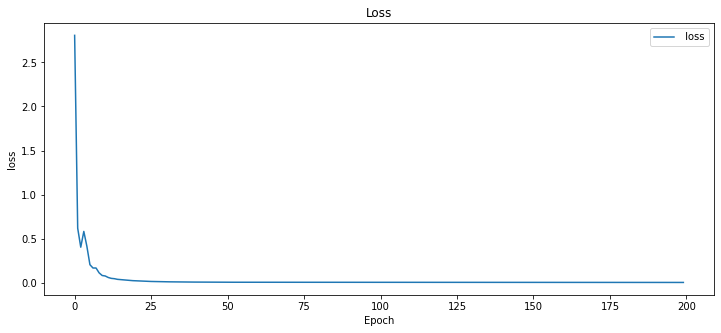

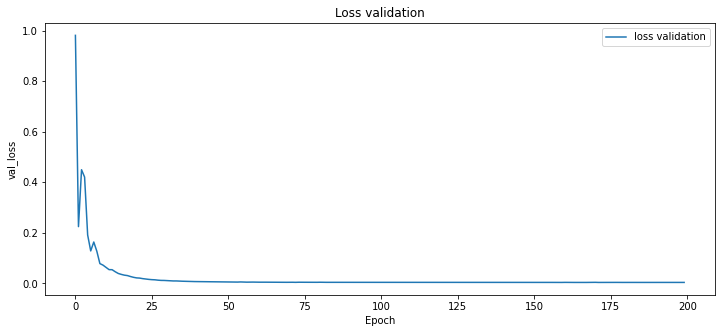

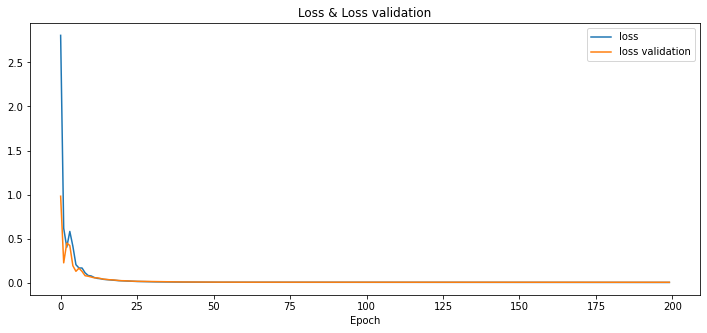

In [ ]:
print('Loss function = mean_squared_error')
print('OPtimizer = adam')
print('One hidden layer')
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(history_1.history["loss"], label=" loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
ax1.legend()

fig12, ax12 = plt.subplots(figsize=(12,5))
ax12.plot(history_1.history["val_loss"], label="loss validation")
plt.title("Loss validation")
plt.ylabel("val_loss")
plt.xlabel("Epoch")
ax12.legend()

fig112, ax112 = plt.subplots(figsize=(12,5))
ax112.plot(history_1.history["loss"], label="loss")
ax112.plot(history_1.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax112.legend()

In [ ]:
model_2.compile(loss="mean_squared_error",
              optimizer="Adam",
              metrics=["mse","mae"])
history_2 = model_2.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
5/5 [==============================] - 1s 53ms/step - loss: 2.4112 - mse: 2.4112 - mae: 1.5204 - val_loss: 1.2705 - val_mse: 1.2705 - val_mae: 1.1044
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.9245 - mse: 0.9245 - mae: 0.9248 - val_loss: 0.3367 - val_mse: 0.3367 - val_mae: 0.5461
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1892 - mse: 0.1892 - mae: 0.3752 - val_loss: 0.0471 - val_mse: 0.0471 - val_mae: 0.1764
Epoch 4/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0664 - mse: 0.0664 - mae: 0.2066 - val_loss: 0.1108 - val_mse: 0.1108 - val_mae: 0.2798
Epoch 5/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1422 - mse: 0.1422 - mae: 0.3313 - val_loss: 0.1238 - val_mse: 0.1238 - val_mae: 0.3029
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1246 - mse: 0.1246 - mae: 0.3095 - val_loss: 0.0892 - val_mse: 0.0892 - val_mae: 0.2583
Epoch 7/200
5/5 [===========

Loss function = mean_squared_error
OPtimizer = adam
Two hidden layer


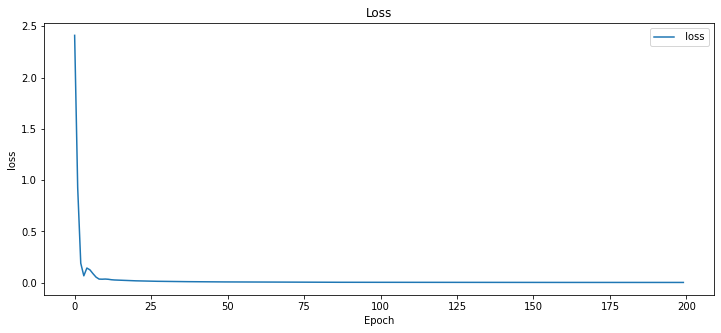

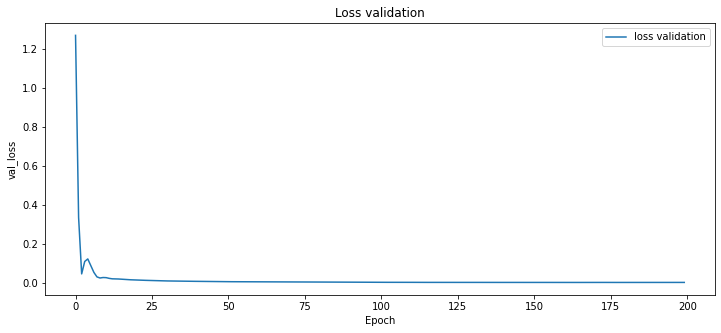

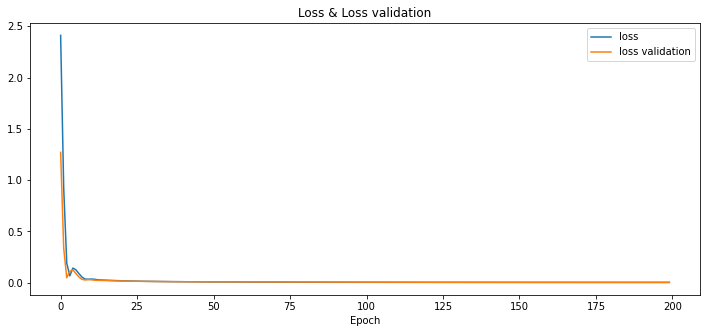

In [ ]:
print('Loss function = mean_squared_error')
print('OPtimizer = adam')
print('Two hidden layer')
fig2, ax2 = plt.subplots(figsize=(12,5))
ax2.plot(history_2.history["loss"], label=" loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
ax2.legend()

fig22, ax22 = plt.subplots(figsize=(12,5))
ax22.plot(history_2.history["val_loss"], label="loss validation")
plt.title("Loss validation")
plt.ylabel("val_loss")
plt.xlabel("Epoch")
ax22.legend()

fig212, ax212 = plt.subplots(figsize=(12,5))
ax212.plot(history_2.history["loss"], label="loss")
ax212.plot(history_2.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax212.legend()

In [ ]:
model_3.compile(loss="mean_squared_error",
              optimizer="Adam",
              metrics=["mse","mae"])
history_3 = model_3.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
5/5 [==============================] - 2s 82ms/step - loss: 7.0412 - mse: 7.0412 - mae: 2.4519 - val_loss: 2.2613 - val_mse: 2.2613 - val_mae: 1.4399
Epoch 2/200
5/5 [==============================] - 0s 17ms/step - loss: 1.5204 - mse: 1.5204 - mae: 1.1067 - val_loss: 0.6161 - val_mse: 0.6161 - val_mae: 0.7178
Epoch 3/200
5/5 [==============================] - 0s 24ms/step - loss: 0.4640 - mse: 0.4640 - mae: 0.5999 - val_loss: 0.1281 - val_mse: 0.1281 - val_mae: 0.3118
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1173 - mse: 0.1173 - mae: 0.2682 - val_loss: 0.1119 - val_mse: 0.1119 - val_mae: 0.2600
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1718 - mse: 0.1718 - mae: 0.3355 - val_loss: 0.1432 - val_mse: 0.1432 - val_mae: 0.3212
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1370 - mse: 0.1370 - mae: 0.2833 - val_loss: 0.0700 - val_mse: 0.0700 - val_mae: 0.1899
Epoch 7/200
5/5 [===========

Loss function = mean_squared_error
OPtimizer = Adam
Three hidden layer


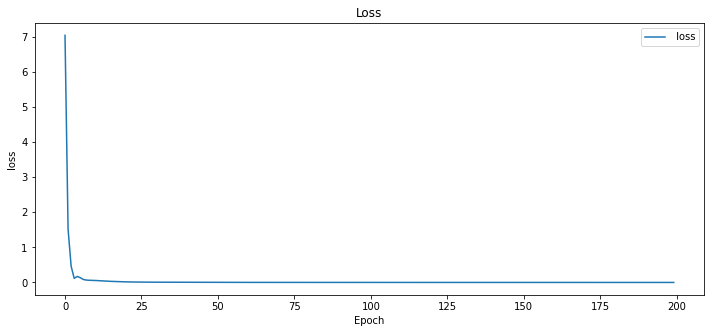

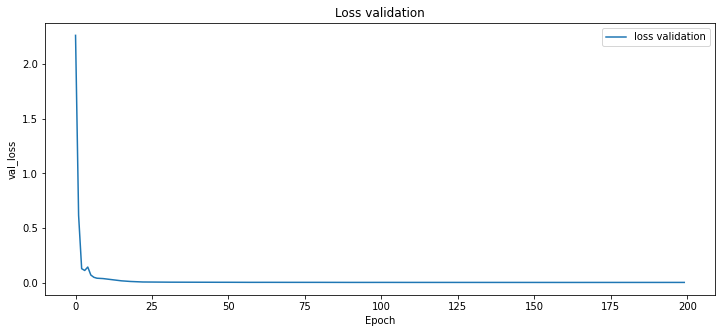

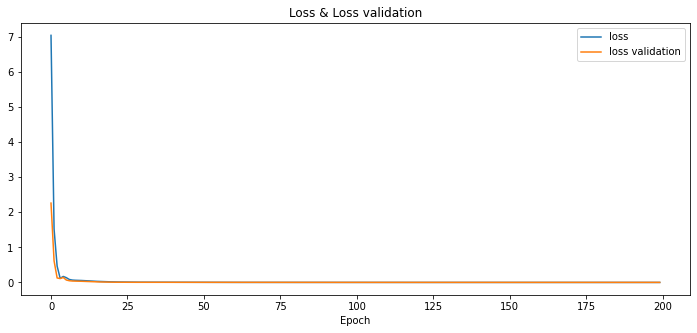

In [ ]:
print('Loss function = mean_squared_error')
print('OPtimizer = Adam')
print('Three hidden layer')
fig3, ax3 = plt.subplots(figsize=(12,5))
ax3.plot(history_3.history["loss"], label=" loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
ax3.legend()

fig32, ax32 = plt.subplots(figsize=(12,5))
ax32.plot(history_3.history["val_loss"], label="loss validation")
plt.title("Loss validation")
plt.ylabel("val_loss")
plt.xlabel("Epoch")
ax32.legend()

fig312, ax312 = plt.subplots(figsize=(12,5))
ax312.plot(history_3.history["loss"], label="loss")
ax312.plot(history_3.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax312.legend()

In [ ]:
predicted_1=model_1.predict(x_test)
R2_1=r2_score(y_test,predicted_1)

predicted_2=model_2.predict(x_test)
R2_2=r2_score(y_test,predicted_2)

predicted_3=model_3.predict(x_test)
R2_3=r2_score(y_test,predicted_3)

print(f'--------\nr2_score for model-1: {R2_1} \n-----\nr2_score for model-2: {R2_2} \n-----\nr2_score for model-3: {R2_3}\n--------')

1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 110ms/step
--------
r2_score for model-1: 0.8834210287868121 
-----
r2_score for model-2: 0.8284602263699432 
-----
r2_score for model-3: 0.9037305813105148
--------


In [ ]:
model_3.compile(loss="mean_absolute_error",
              optimizer="rmsprop",
              metrics=["mse","mae"])
history_32 = model_3.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
5/5 [==============================] - 1s 91ms/step - loss: 0.1299 - mse: 0.0492 - mae: 0.1299 - val_loss: 0.2484 - val_mse: 0.0655 - val_mae: 0.2484
Epoch 2/200
5/5 [==============================] - 0s 17ms/step - loss: 0.1394 - mse: 0.0257 - mae: 0.1394 - val_loss: 0.0964 - val_mse: 0.0114 - val_mae: 0.0964
Epoch 3/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0924 - mse: 0.0105 - mae: 0.0924 - val_loss: 0.0808 - val_mse: 0.0097 - val_mae: 0.0808
Epoch 4/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0829 - mse: 0.0090 - mae: 0.0829 - val_loss: 0.0853 - val_mse: 0.0087 - val_mae: 0.0853
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0794 - mse: 0.0078 - mae: 0.0794 - val_loss: 0.0875 - val_mse: 0.0108 - val_mae: 0.0875
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0758 - mse: 0.0070 - mae: 0.0758 - val_loss: 0.0800 - val_mse: 0.0078 - val_mae: 0.0800
Epoch 7/200
5/5 [===========

Loss function = mean_absolute_error
OPtimizer = rmsprop
Three hidden layer


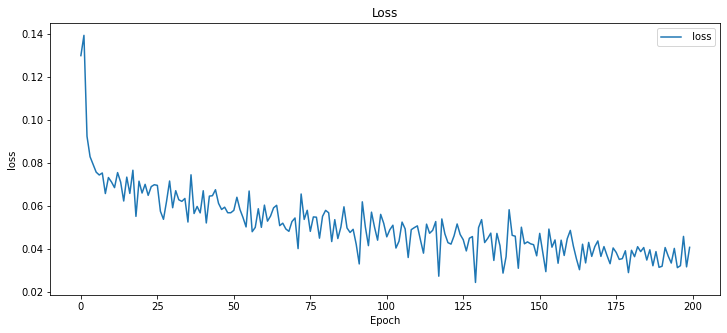

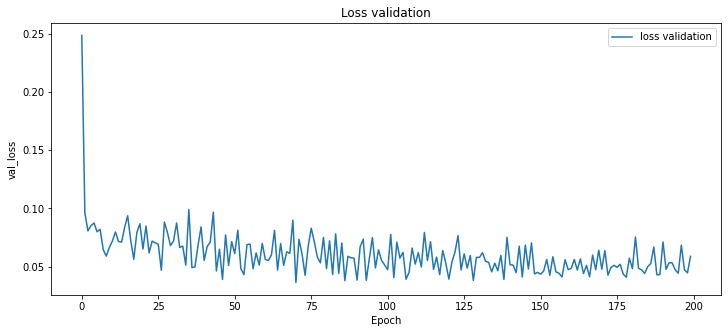

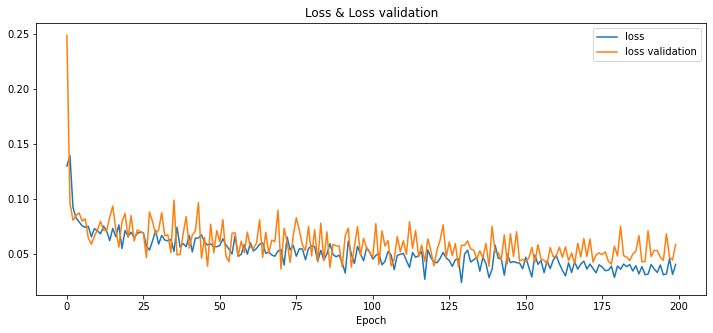

In [ ]:
print('Loss function = mean_absolute_error')
print('OPtimizer = rmsprop')
print('Three hidden layer')
fig32, ax32 = plt.subplots(figsize=(12,5))
ax32.plot(history_32.history["loss"], label=" loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
ax32.legend()

fig322, ax322 = plt.subplots(figsize=(12,5))
ax322.plot(history_32.history["val_loss"], label="loss validation")
plt.title("Loss validation")
plt.ylabel("val_loss")
plt.xlabel("Epoch")
ax322.legend()

fig3222, ax3222 = plt.subplots(figsize=(12,5))
ax3222.plot(history_32.history["loss"], label="loss")
ax3222.plot(history_32.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax3222.legend()

In [ ]:
model_3.compile(loss="mean_squared_error",
              optimizer="rmsprop",
              metrics=["mse","mae"])
history_33 = model_3.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
5/5 [==============================] - 1s 55ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0616 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0439
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 7.2585e-04 - mse: 7.2585e-04 - mae: 0.0210 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0416
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0296 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0606
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0360 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0524
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0372 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0451
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0366 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0452
Epoch 7/200
5/5 [===

Loss function = mean_squared_error
OPtimizer = rmsprop
Three hidden layer


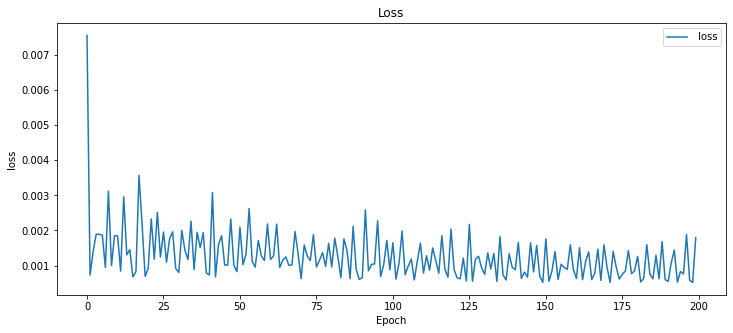

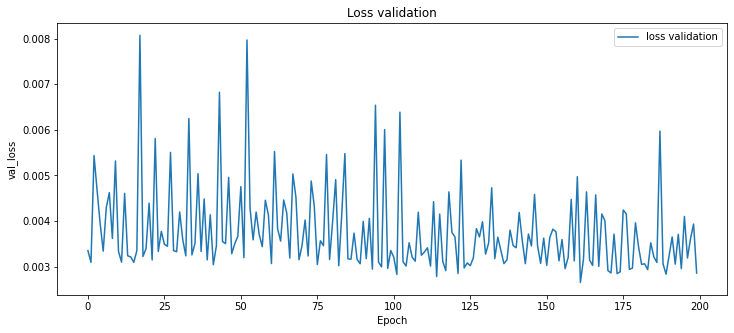

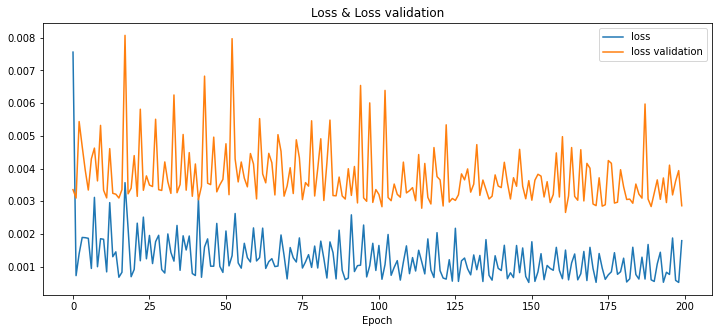

In [ ]:
print('Loss function = mean_squared_error')
print('OPtimizer = rmsprop')
print('Three hidden layer')
fig33, ax33 = plt.subplots(figsize=(12,5))
ax33.plot(history_33.history["loss"], label=" loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
ax33.legend()

fig323, ax323 = plt.subplots(figsize=(12,5))
ax323.plot(history_33.history["val_loss"], label="loss validation")
plt.title("Loss validation")
plt.ylabel("val_loss")
plt.xlabel("Epoch")
ax323.legend()

fig3223, ax3223 = plt.subplots(figsize=(12,5))
ax3223.plot(history_33.history["loss"], label="loss")
ax3223.plot(history_33.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax3223.legend()

In [ ]:
model_3.compile(loss="mean_absolute_error",
              optimizer="Adam",
              metrics=["mse","mae"])
history_34 = model_3.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
5/5 [==============================] - 2s 86ms/step - loss: 0.0261 - mse: 0.0010 - mae: 0.0261 - val_loss: 0.0455 - val_mse: 0.0034 - val_mae: 0.0455
Epoch 2/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0237 - mse: 9.2854e-04 - mae: 0.0237 - val_loss: 0.0438 - val_mse: 0.0034 - val_mae: 0.0438
Epoch 3/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0219 - mse: 7.6947e-04 - mae: 0.0219 - val_loss: 0.0429 - val_mse: 0.0031 - val_mae: 0.0429
Epoch 4/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0174 - mse: 5.2440e-04 - mae: 0.0174 - val_loss: 0.0424 - val_mse: 0.0032 - val_mae: 0.0424
Epoch 5/200
5/5 [==============================] - 0s 20ms/step - loss: 0.0193 - mse: 5.7768e-04 - mae: 0.0193 - val_loss: 0.0411 - val_mse: 0.0028 - val_mae: 0.0411
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0182 - mse: 5.4322e-04 - mae: 0.0182 - val_loss: 0.0418 - val_mse: 0.0031 - val_mae: 0.0418
Epoch 7/

Loss function = mean_absolute_error
OPtimizer = Adam
Three hidden layer


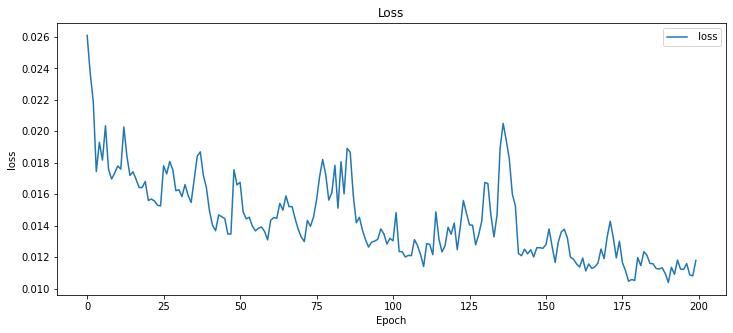

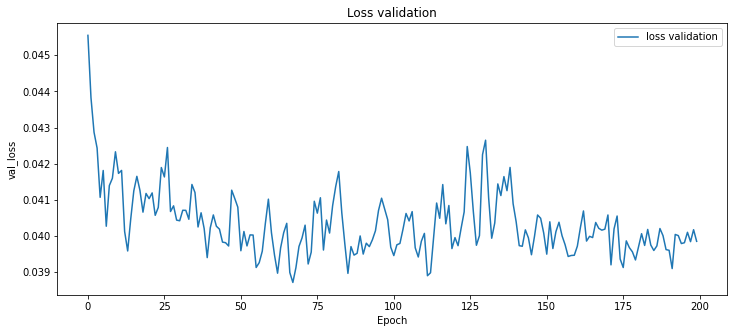

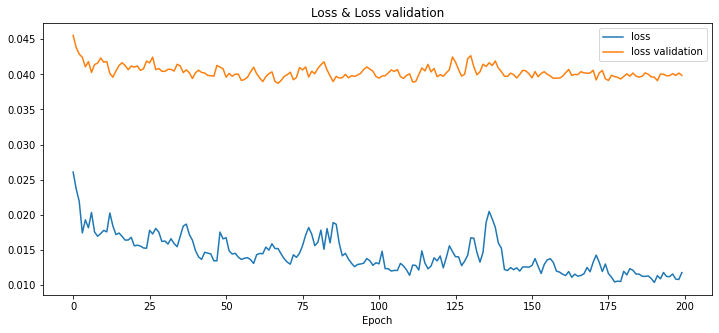

In [ ]:
print('Loss function = mean_absolute_error')
print('OPtimizer = Adam')
print('Three hidden layer')
fig34, ax34 = plt.subplots(figsize=(12,5))
ax34.plot(history_34.history["loss"], label=" loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
ax34.legend()

fig324, ax324 = plt.subplots(figsize=(12,5))
ax324.plot(history_34.history["val_loss"], label="loss validation")
plt.title("Loss validation")
plt.ylabel("val_loss")
plt.xlabel("Epoch")
ax324.legend()

fig3224, ax3224 = plt.subplots(figsize=(12,5))
ax3224.plot(history_34.history["loss"], label="loss")
ax3224.plot(history_34.history["val_loss"], label="loss validation")
plt.title("Loss & Loss validation")
plt.xlabel("Epoch")
ax3224.legend()

In [ ]:
#Calculation of the difference between the real and predicted prices for 5 random cases

test_predictions = model_3.predict(x_test)
y_test2 = y_test.reset_index()
count=0
yy = []

pp = []
while(count<5):
  m = random.randint(0, 30)
  y = y_test2['price'][m]
  yy.append(y)
  p = test_predictions[m]
  pp.append(p)
  a=abs(y-p)
  print("---------------------------------------------------------------------")
  print(f'{count+1}- \n   predicted price with model_3: {p} \n   real price: [{y}] \n   price difference: {a} ')
  count = count+1
print("---------------------------------------------------------------------")


1/1 [==============================] - 0s 23ms/step
---------------------------------------------------------------------
1- 
   predicted price with model_3: [0.10777858] 
   real price: [0.09252271486023533] 
   price difference: [0.01525586] 
---------------------------------------------------------------------
2- 
   predicted price with model_3: [0.25056076] 
   real price: [0.20805818976217666] 
   price difference: [0.04250257] 
---------------------------------------------------------------------
3- 
   predicted price with model_3: [0.05152169] 
   real price: [0.045181470632044085] 
   price difference: [0.00634022] 
---------------------------------------------------------------------
4- 
   predicted price with model_3: [0.27079052] 
   real price: [0.29112258577031924] 
   price difference: [0.02033207] 
---------------------------------------------------------------------
5- 
   predicted price with model_3: [-0.01408127] 
   real price: [0.026587557718087462] 
   price d

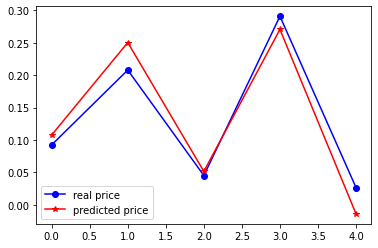

In [ ]:
plt.plot( yy,'bo-', label='real price')
plt.plot(pp,'r*-', label='predicted price')
plt.legend()

In [ ]:
R2_5=r2_score(yy,pp)
R2_5

0.9191825304062965

In [ ]:
#-------------------------------------------------------------------------------